# Explain Results of trained RoBERTa models
- use shapley values to explain the model predictions
- compare model predictions (trained on cleaned vs. trained on uncleaned dataset) for human and AI generated content
- explains fooling the model using adversarial attacks

# 0. Setup

## 0.0 Imports

In [1]:
import sys
import os
from matplotlib import pyplot as plt
from transformers import utils
from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning)  # Suppress future warnings

BASE_DIR = "../../"
sys.path.append(BASE_DIR)

from src.general_functions_and_patterns_for_detection import (
    DETECT_RL_DIR,RESULT_DIR,
    ModelExplainer,
    seed_everything
)

SEED = 2023
seed_everything(SEED)
utils.logging.set_verbosity_error()  # Suppress standard warnings

2025-09-19 13:36:12.103571: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-19 13:36:12.120238: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758288972.138759 3658579 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758288972.144061 3658579 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758288972.158852 3658579 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 0.1 Models to be analysed

In [3]:
# PROMPTS=["direct_prompt", "prompt_few_shot", "prompt_SICO", "paraphrase_polish_human", "paraphrase_polish_llm"]
# # PROMPTS=["paraphrase_polish_human", "paraphrase_polish_llm"]
# _prompt_str = "_" + "-".join(PROMPTS)
# _llm_temp = "claude"
# 
# _path_not_cleaned = f"{DETECTOR_RESULTS}{_llm_temp}_direct_prompt_all_domains_multi_llm_not_cleaned{_prompt_str}"
# _path_cleaned = f"{DETECTOR_RESULTS}{_llm_temp}_direct_prompt_all_domains_multi_llm_cleaned{_prompt_str}"
# directory_results_claude_uncleaned = f"{DETECTOR_RESULTS}roberta_base_classifier_Claude-instant_all_data"   
CLAUDE_MODELS_DIR = os.path.join(RESULT_DIR, "T02")
model_cleaned_dataset = f"{CLAUDE_MODELS_DIR}claude_direct_prompt_all_domains_multi_llm_cleaned"
model_uncleaned_dataset = f"{CLAUDE_MODELS_DIR}claude_direct_prompt_all_domains_multi_llm_not_cleaned"
directory_results_claude_uncleaned = model_uncleaned_dataset # f"{RESULT_DIR}/roberta_base_classifier_Claude-instant_all_data"
mexp = ModelExplainer(directory_results_claude_uncleaned, model_cleaned_dataset, model_uncleaned_dataset)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


# 1. Visualisations

## 1.1 Text and predictions

In [3]:
input_text = 'Here is a 10 sentence abstract for the article title "Fundamental Limits to Position Determination by Concentration Gradients":Organisms across nature have evolved to determine their position using concentration gradients of signaling molecules. However, gradient sensing poses fundamental physical limitations in accuracy and precision. This study explores the biophysical limits to localization from concentration gradients. A computational model is developed to describe gradient formation and interpret signal transduction by cell surface receptors in response to different gradient profiles. The model accounts for stochastic variability in ligand-receptor binding and finite numbers of receptors. Spatial resolution is shown to degrade significantly for shallow gradients and small cell sizes due to stochastic noise. Optimal gradient shapes are identified that allow sub-cellular precision even in noisy conditions. Experimental measurements of gradient sensing match predictions from the biophysical model. The results establish baselines for position determination based solely on gradient interpretation. Fundamental tradeoffs between accuracy, precision and measurement time are characterized. This provides insights into the physical design constraints shaped by evolution in gradient-based navigation across scales from microbes to multicellular organisms.'

input_text_llm_modified = "Organisms across nature have evolved to determine their position using concentration gradients of signaling molecules. However, gradient sensing poses fundamental physical limitations in accuracy and precision. This study explores the biophysical limits to localization from concentration gradients. A computational model is developed to describe gradient formation and interpret signal transduction by cell surface receptors in response to different gradient profiles. The model accounts for stochastic variability in ligand-receptor binding and finite numbers of receptors. Spatial resolution is shown to degrade significantly for shallow gradients and small cell sizes due to stochastic noise. Optimal gradient shapes are identified that allow sub-cellular precision even in noisy conditions. Experimental measurements of gradient sensing match predictions from the biophysical model. The results establish baselines for position determination based solely on gradient interpretation. Fundamental tradeoffs between accuracy, precision and measurement time are characterized. This provides insights into the physical design constraints shaped by evolution in gradient-based navigation across scales from microbes to multicellular organisms."

input_text2 = "Here is a 7 sentence abstract for the provided article title:Orthogonal rational functions hold theoretical and applied importance in fields such as numerical analysis and signal processing. This article presents novel spectral methods to analyze orthogonal rational functions on the real line. These methods involve expanding rational functions into series of orthogonal polynomials multiplied by denominators of increasing degree. The author first reviews standard tools for working with orthogonal polynomials and introduces necessary extensions to handle rational functions. Specific spectral methods for approximating orthogonal rational functions are then developed, with proofs establishing their accuracy and convergence properties. Numerical experiments demonstrate that the proposed spectral approaches enable efficient and accurate representation of orthogonal rational functions. This work advances the field of rational approximations by providing powerful new techniques with clear convergence guarantees. Overall, the spectral methods introduced here hold significance for both theoretical analysis and practical computation with orthogonal rational functions."


input_text_human_cleaned = "We study the population of satellite galaxies formed in a suite ofN-body/gas dynamical simulations of galaxy formation in a LCDM universe. We find little spatial or kinematic bias between the dark matter and the satellite population. The velocity dispersion of the satellites is a good indicator of the virial velocity of the halo: \\sigma_{sat}/V_{vir}=0.9 +/- 0.2. Applied to the Milky Way and M31 this gives V_{vir}^{MW}=109 +/- 22$ km/s andV_{vir}^{M31} = 138 +/- 35 km/s, respectively, substantially lower than the rotation speed of their disk components. The detailed kinematics of simulated satellites and dark matter are also in good agreement. By contrast, the stellar halo of the simulated galaxies is kinematically and spatially distinct from the population of surviving satellites. This is because the survival of a satellite depends on mass and on time of accretion; surviving satellites are biased toward low-mass systems that have been recently accreted by the galaxy. Our results support recent proposals for the origin of the systematic differences between stars in the Galactic halo and in Galactic satellites: the elusive``building blocks'' of the Milky Way stellar halo were on average more massive,and were accreted (and disrupted) earlier than the population of dwarfs that has survived self-bound until the present."

input_text_human = "We study the population of satellite galaxies formed in a suite ofN-body/gasdynamical simulations of galaxy formation in a LCDM universe. We findlittle spatial or kinematic bias between the dark matter and the satellitepopulation. The velocity dispersion of the satellites is a good indicator ofthe virial velocity of the halo: \\sigma_{sat}/V_{vir}=0.9 +/- 0.2. Applied tothe Milky Way and M31 this gives V_{vir}^{MW}=109 +/- 22$ km/s andV_{vir}^{M31} = 138 +/- 35 km/s, respectively, substantially lower than therotation speed of their disk components. The detailed kinematics of simulatedsatellites and dark matter are also in good agreement. By contrast, the stellarhalo of the simulated galaxies is kinematically and spatially distinct from thepopulation of surviving satellites. This is because the survival of a satellitedepends on mass and on time of accretion; surviving satellites are biasedtoward low-mass systems that have been recently accreted by the galaxy. Ourresults support recent proposals for the origin of the systematic differencesbetween stars in the Galactic halo and in Galactic satellites: the elusive``building blocks'' of the Milky Way stellar halo were on average more massive,and were accreted (and disrupted) earlier than the population of dwarfs thathas survived self-bound until the present."

input_text_human_modified = "Here is a 7 sentence abstract for the provided article title: We study the population of satellite galaxies formed in a suite ofN-body/gasdynamical simulations of galaxy formation in a LCDM universe. We findlittle spatial or kinematic bias between the dark matter and the satellitepopulation. The velocity dispersion of the satellites is a good indicator ofthe virial velocity of the halo: \\sigma_{sat}/V_{vir}=0.9 +/- 0.2. Applied tothe Milky Way and M31 this gives V_{vir}^{MW}=109 +/- 22$ km/s andV_{vir}^{M31} = 138 +/- 35 km/s, respectively, substantially lower than therotation speed of their disk components. The detailed kinematics of simulatedsatellites and dark matter are also in good agreement. By contrast, the stellarhalo of the simulated galaxies is kinematically and spatially distinct from thepopulation of surviving satellites. This is because the survival of a satellitedepends on mass and on time of accretion; surviving satellites are biasedtoward low-mass systems that have been recently accreted by the galaxy. Ourresults support recent proposals for the origin of the systematic differencesbetween stars in the Galactic halo and in Galactic satellites: the elusive``building blocks'' of the Milky Way stellar halo were on average more massive,and were accreted (and disrupted) earlier than the population of dwarfs thathas survived self-bound until the present."


polished_input_text = r"""We study the population of satellite galaxies formed in a suite of N-body/gas-dynamical simulations of galaxy formation in a ΛCDM universe. We find little spatial or kinematic bias between the dark matter and the satellite population. The velocity dispersion of the satellites is a good indicator of the virial velocity of the halo:
$\sigma_{\text{sat}} / V_{\text{vir}} = 0.9 \pm 0.2$.

Applied to the Milky Way and M31, this gives:
$V_{\text{vir}}^{\text{MW}} = 109 \pm 22$ km/s and
$V_{\text{vir}}^{\text{M31}} = 138 \pm 35$ km/s, respectively — substantially lower than the rotation speed of their disk components.

The detailed kinematics of simulated satellites and dark matter are also in good agreement. By contrast, the stellar halo of the simulated galaxies is kinematically and spatially distinct from the population of surviving satellites. This is because the survival of a satellite depends on mass and on time of accretion; surviving satellites are biased toward low-mass systems that have been recently accreted by the galaxy.

Our results support recent proposals for the origin of the systematic differences between stars in the Galactic halo and in Galactic satellites: the elusive “building blocks” of the Milky Way stellar halo were, on average, more massive and were accreted (and disrupted) earlier than the population of dwarfs that has survived self-bound until the present.
"""

human_text_2 = "An operator theoretic approach to orthogonal rational functions on the unit circle with poles in its exterior is presented in this paper. This approach is based on the identification of a suitable matrix representation of the multiplication operator associated with the corresponding orthogonality measure. Two different alternatives are discussed, depending whether we use for the matrix representation the standard basis of orthogonal rational functions,or a new one with poles alternatively located in the exterior and the interior of the unit circle. The corresponding representations are linear fractional transformations with matrix coefficients acting respectively on Hessenberg and five-diagonal unitary matrices.  In consequence, the orthogonality measure can be recovered from the spectral measure of an infinite unitary matrix depending uniquely on the poles and the parameters of the recurrence relation for the orthogonal rational functions.Besides, the zeros of the orthogonal and para-orthogonal rational functions are identified as the eigenvalues of matrix linear fractional transformations of finite Hessenberg and five-diagonal matrices.  As an application of this operator approach, we obtain new relations between the support of the orthogonality measure and the location of the poles and parameters of the recurrence relation, generalizing to the rational case known results for orthogonal polynomials on the unit circle.  Finally, we extend these results to orthogonal polynomials on the real line with poles in the lower half plane."

In [4]:
print("prediction human text: ", mexp.f_predict([input_text_human, input_text_human_modified, polished_input_text, human_text_2, input_text_human_cleaned], 
      tokenizer=mexp.tokenizer_claude_cleaned, _model=mexp.model_claude_cleaned))
print("prediction llm text: ", mexp.f_predict([input_text, input_text_llm_modified, input_text2], 
      tokenizer=mexp.tokenizer_claude_cleaned, _model=mexp.model_claude_cleaned))
print("prediction human text uncleaned: ", mexp.f_predict([input_text_human, input_text_human_modified, polished_input_text, human_text_2, input_text_human_cleaned], 
      tokenizer=mexp.tokenizer_claude_uncleaned, _model=mexp.model_claude_uncleaned))
print("prediction llm text uncleaned: ", mexp.f_predict([input_text, input_text_llm_modified, input_text2], 
      tokenizer=mexp.tokenizer_claude_uncleaned, _model=mexp.model_claude_uncleaned))
print("prediction human text uncleaned: ", mexp.f_predict([input_text_human, input_text_human_modified, polished_input_text, human_text_2, input_text_human_cleaned], 
      tokenizer=mexp.tokenizer_claude_uncleaned2, _model=mexp.model_claude_uncleaned2))
print("prediction llm text uncleaned: ", mexp.f_predict([input_text, input_text_llm_modified, input_text2], 
      tokenizer=mexp.tokenizer_claude_uncleaned2, _model=mexp.model_claude_uncleaned2))

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


prediction human text:  [0.9969217  0.9969894  0.10586579 0.00930241 0.1484885 ]
prediction llm text:  [0.0038804  0.00406667 0.00342193]
prediction human text uncleaned:  [9.9982041e-01 3.9529572e-05 9.9978071e-01 9.8590416e-01 9.9979049e-01]
prediction llm text uncleaned:  [3.124056e-05 3.642403e-05 3.155802e-05]
prediction human text uncleaned:  [0.9975178  0.16162802 0.9892737  0.80454254 0.99065644]
prediction llm text uncleaned:  [0.00208533 0.11533693 0.00192186]


## 1.2 Default shapley explanations uncleaned dataset

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


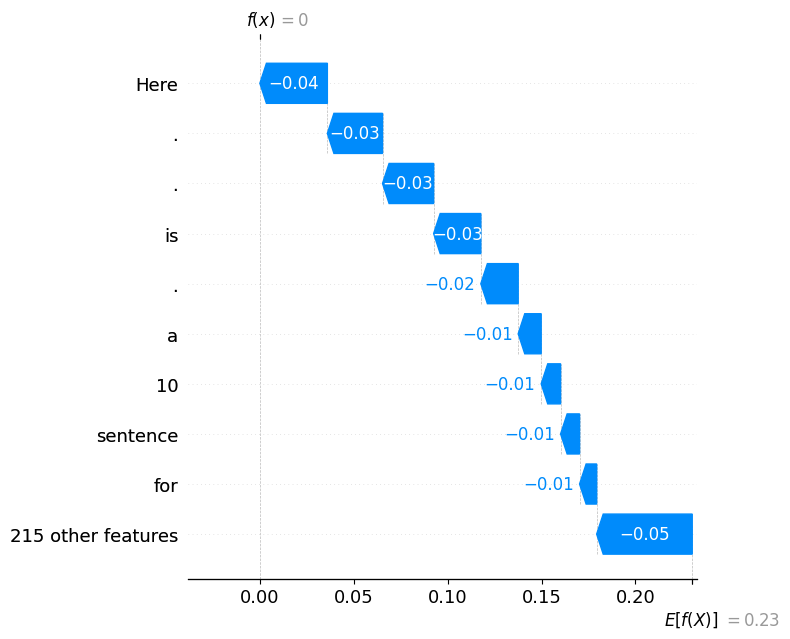

In [5]:
_value = mexp.generate_shap_values([input_text], "uncleaned")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall", max_plot_waterfall=10)

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig(f"{DETECT_RL_DIR}/image/shap_waterfall_llm_uncleaned2_v2.svg", format="svg")

plt.tight_layout()
plt.show()

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


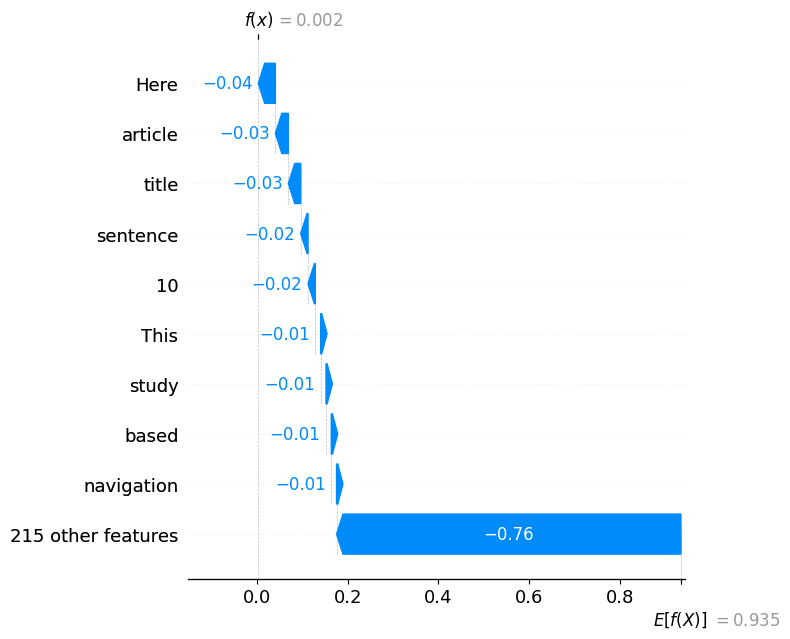

In [6]:
_value = mexp.generate_shap_values([input_text], "uncleaned2")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall", max_plot_waterfall=10)

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig(f"{DETECT_RL_DIR}/image/shap_waterfall_llm_uncleaned2_v2.svg", format="svg")

plt.tight_layout()
plt.show()

In [7]:
input_text

'Here is a 10 sentence abstract for the article title "Fundamental Limits to Position Determination by Concentration Gradients":Organisms across nature have evolved to determine their position using concentration gradients of signaling molecules. However, gradient sensing poses fundamental physical limitations in accuracy and precision. This study explores the biophysical limits to localization from concentration gradients. A computational model is developed to describe gradient formation and interpret signal transduction by cell surface receptors in response to different gradient profiles. The model accounts for stochastic variability in ligand-receptor binding and finite numbers of receptors. Spatial resolution is shown to degrade significantly for shallow gradients and small cell sizes due to stochastic noise. Optimal gradient shapes are identified that allow sub-cellular precision even in noisy conditions. Experimental measurements of gradient sensing match predictions from the bio

## 1.3 Shap values trained on a model of the cleaned dataset

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


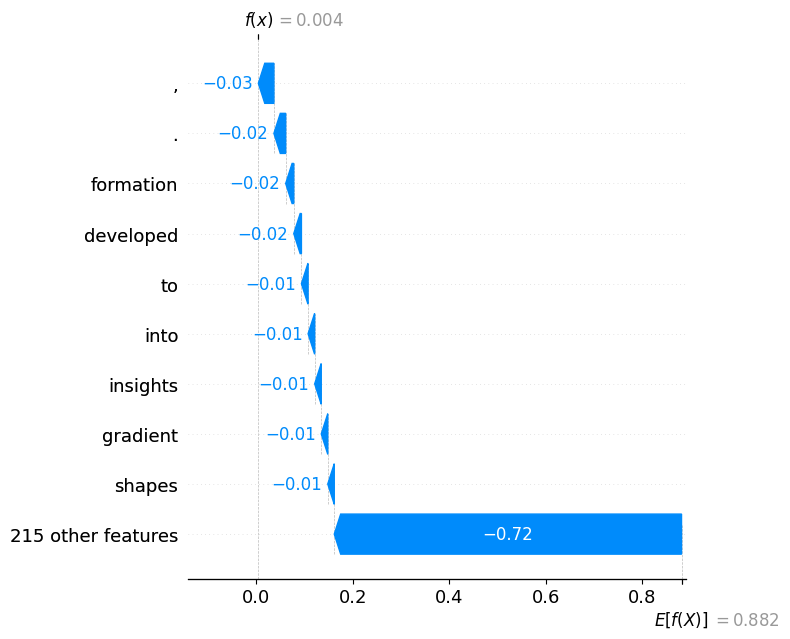

In [8]:
_value = mexp.generate_shap_values([input_text], "cleaned")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall", max_plot_waterfall=10)

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig(f"{DETECT_RL_DIR}/image/shap_waterfall_llm_input_text_cleaned_v2.svg", format="svg")

plt.tight_layout()
plt.show()

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


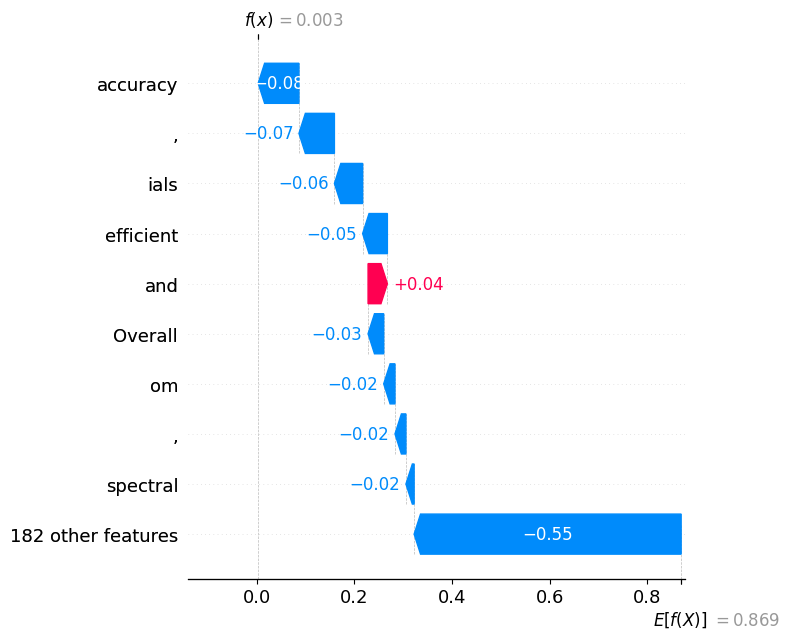

In [9]:
_value = mexp.generate_shap_values([input_text2], "cleaned")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall", max_plot_waterfall=10)

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig(f"{DETECT_RL_DIR}/image/shap_waterfall_llm_cleaned.svg", format="svg")

plt.tight_layout()
plt.show()

## 1.4 Testing possibility for adversarial attacks

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


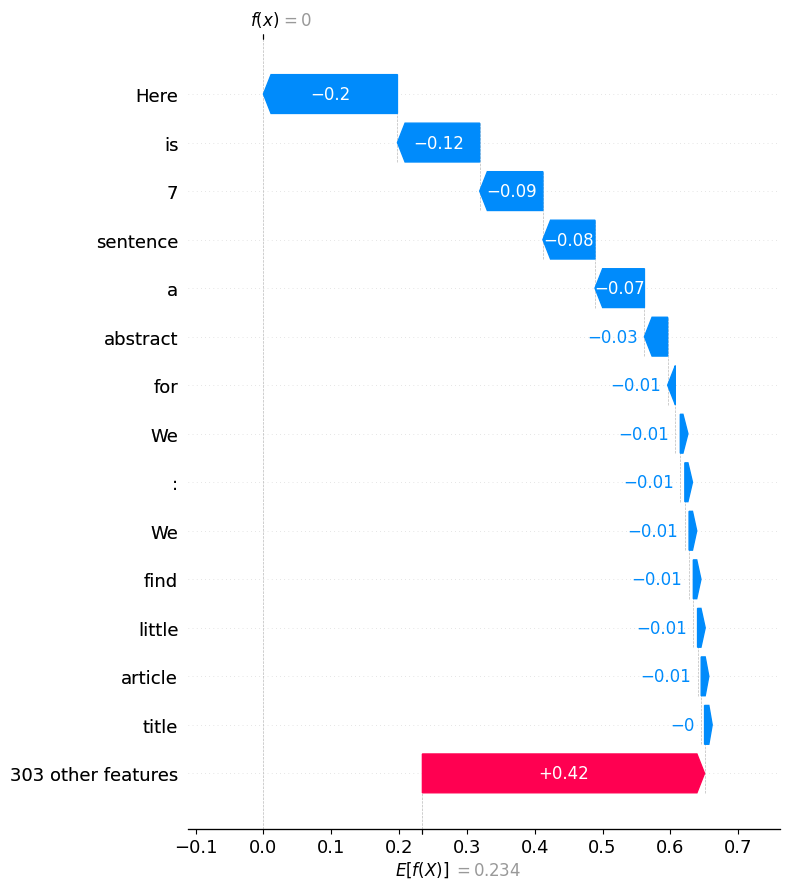

In [10]:
_value = mexp.generate_shap_values([input_text_human_modified], "uncleaned")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall", max_plot_waterfall=15)

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig(f"{DETECT_RL_DIR}/image/shap_waterfall_human_attacked_uncleaned.svg", format="svg")

plt.tight_layout()
plt.show()

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


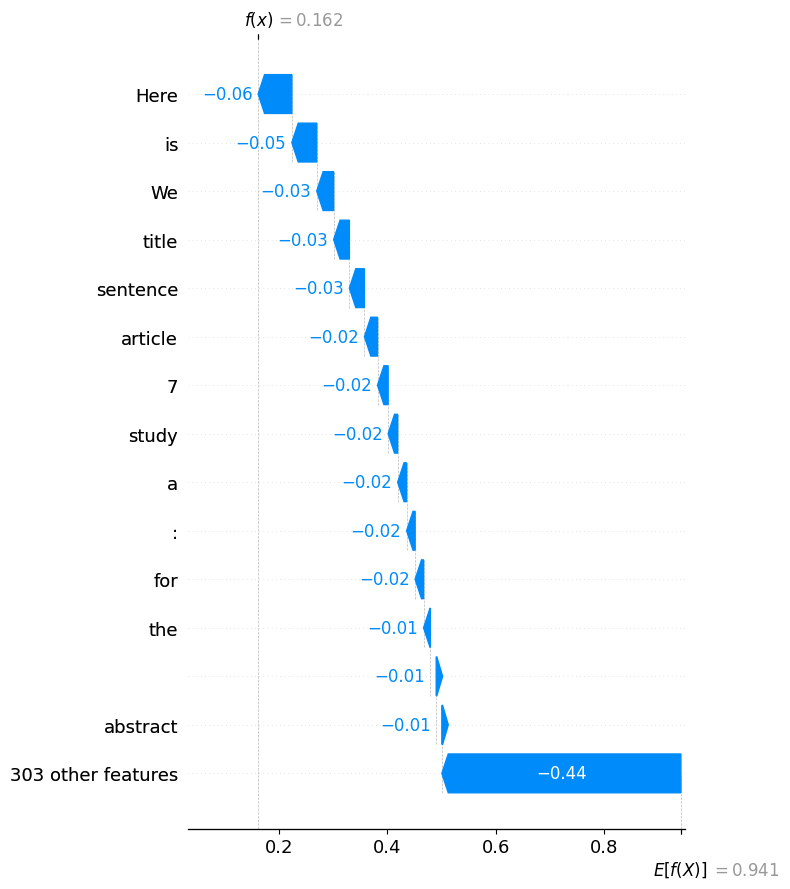

In [11]:
_value = mexp.generate_shap_values([input_text_human_modified], "uncleaned2")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall", max_plot_waterfall=15)

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig(f"{DETECT_RL_DIR}/image/shap_waterfall_human_attacked_uncleaned.svg", format="svg")

plt.tight_layout()
plt.show()

/mnt/hdd-baracuda/pdingfelder/mt_philipp_dingfelder_generated_text_detection/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


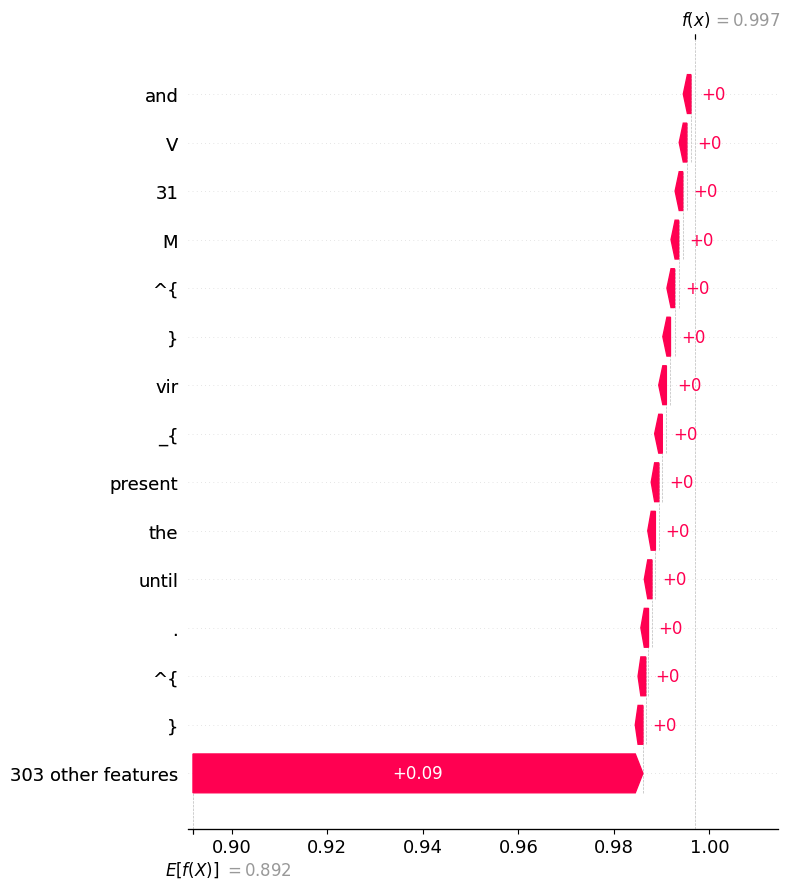

In [12]:
_value = mexp.generate_shap_values([input_text_human_modified], "cleaned")
ax = mexp.generate_shap_plots(_value[0], type_of_plot="waterfall")

new_labels = [label.get_text().split('=')[-1].strip() for label in ax.get_yticklabels()]
ax.set_yticklabels(new_labels)


# Save the figure as SVG
fig = ax.figure
fig.tight_layout()
fig.savefig("shap_waterfall_human_attacked_uncleaned.svg", format="svg")

plt.tight_layout()
plt.show()